<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#polynomial-regression" data-toc-modified-id="polynomial-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>polynomial regression</a></span></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

In [4]:
ames_df = pd.read_csv("ames.csv")
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
# dropping columns with null values 

ames_cleaned_df = ames_df.dropna(axis=1)
ames_cleaned_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
# dropping non-numeric variables 

ames_cleaned_num_df = ames_cleaned_df.select_dtypes(exclude=['object', 'category'])
ames_cleaned_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

In [16]:
ames_cleaned_num_df.corr()["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

## Linear Regression

In [25]:
X =  ames_cleaned_num_df[["YearBuilt"]]
y =  ames_cleaned_num_df["SalePrice"]
X = sm.add_constant(X)

model = sm.OLS(y,X)

results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 22 May 2025   Prob (F-statistic):          2.99e-103
Time:                        13:38:33   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

In [24]:
X = ames_cleaned_num_df[["YearBuilt"]]
y =  ames_cleaned_num_df["SalePrice"]

X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 22 May 2025   Prob (F-statistic):          2.99e-103
Time:                        13:38:06   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

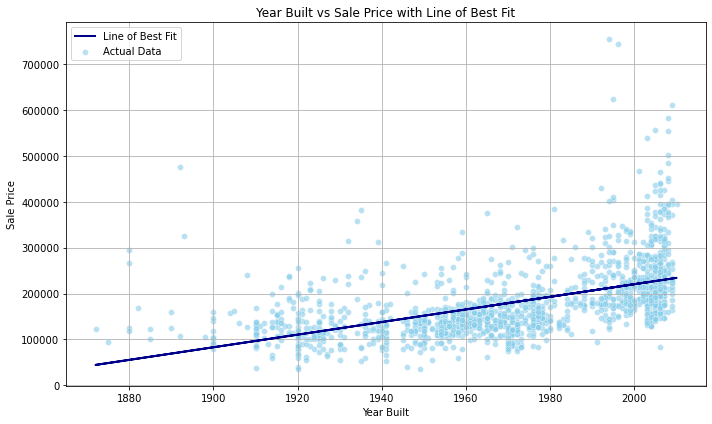

In [26]:
# Visualize our linear regression 

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Extract variables
X = ames_cleaned_num_df[["YearBuilt"]]
y = ames_cleaned_num_df["SalePrice"]

# Add constant (intercept) for statsmodels
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Predict y values using the fitted model
y_pred = results.predict(X_with_const)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["YearBuilt"], y=y, color='skyblue', alpha=0.6, label="Actual Data")
plt.plot(X["YearBuilt"], y_pred, color='darkblue', linewidth=2, label="Line of Best Fit")

# Labels and title
plt.title("Year Built vs Sale Price with Line of Best Fit")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


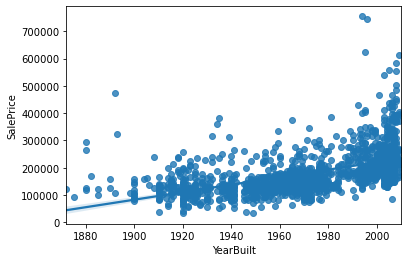

In [28]:
sns.regplot(x = 'YearBuilt', y='SalePrice', data=ames_cleaned_num_df)
plt.show()

In [30]:
X1 = ames_cleaned_num_df[["YearBuilt", "OverallQual", ]]
y1 =  ames_cleaned_num_df["SalePrice"]

X1 = sm.add_constant(X1)

model1 = sm.OLS(y1,X1)
results1 = model.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 22 May 2025   Prob (F-statistic):          2.99e-103
Time:                        13:49:26   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

In [35]:
X1 = ames_cleaned_num_df[["YearBuilt", "OverallQual", ]]
y1 =  ames_cleaned_num_df["SalePrice"]

#split the data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

#train the model
model1 = LinearRegression()
model1. fit(X1_train, y1_train)

LinearRegression()

In [38]:
print(model1.coef_)
print(model1.intercept_)

[  285.58297566 40804.77073565]
-631222.2012309617


In [40]:
X1 = ames_cleaned_num_df.drop("SalePrice", axis=1)
y1 =  ames_cleaned_num_df["SalePrice"]

#split the data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

#train the model
model1 = LinearRegression()
model1. fit(X1_train, y1_train)

LinearRegression()

In [41]:
print(model1.coef_)
print(model1.intercept_)

[-2.12203628e+00 -1.74772514e+02  4.05481824e-01  1.84640315e+04
  3.87342996e+03  3.37344725e+02  1.77596418e+02  9.99457891e+00
 -4.71401985e+00  3.81295556e-01  5.66185461e+00  1.36234135e+01
  1.44662779e+01  3.46292563e+00  3.15526170e+01  1.10883324e+04
 -4.07708927e+02  3.43909058e+03 -1.69099109e+03 -9.06125895e+03
 -1.04054907e+04  5.13425001e+03  4.30347218e+03  1.16211229e+04
  8.19409880e-01  2.54821715e+01 -6.38725933e+00  6.98368396e+00
  3.70790831e+01  6.54645509e+01 -3.59211501e+01 -7.23040874e-01
 -2.02520401e+02 -5.01929714e+02]
-67226.9281685391


In [42]:
X1 = ames_cleaned_num_df[["YearBuilt", "LotArea", "GrLivArea" ,"OverallQual",]]
y1 =  ames_cleaned_num_df["SalePrice"]

#split the data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

#train the model
model1 = LinearRegression()
model1. fit(X1_train, y1_train)

LinearRegression()

In [47]:
X1 = ames_cleaned_num_df[['YearBuilt', 'LotArea', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']]
y1 = ames_cleaned_num_df['SalePrice']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [43]:
print(model1.coef_)
print(model1.intercept_)

[5.12702642e+02 8.57794888e-01 5.46026488e+01 2.50911423e+04]
-1075244.81512287


In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming x1 and y1 are defined DataFrames/Series
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1, y1)

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': X1.columns,
    'Coefficient': model1.coef_
})

# Optionally include intercept
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [model1.intercept_]})

#Combine both
full_df = pd.concat([intercept_df, coef_df], ignore_index=True)

print(full_df)

       Feature    Coefficient
0    Intercept -706080.307130
1    YearBuilt     317.557375
2      LotArea       0.647667
3  OverallQual   21165.104107
4  TotalBsmtSF      26.457682
5    GrLivArea      48.024212
6   GarageCars   13779.880029


In [49]:
for feature, coef in zip(X.columns, model1.coef_):
    print(f"{feature}:{coef:.4f}")
    
# print the intercept 
print(f"Intercept:{model1.intercept_:.4f}")

YearBuilt:317.5574
Intercept:-706080.3071


In [50]:
# Coefficients with column names
coefficients = pd.Series(model1.coef_, index=X1.columns)
print("Coefficients:\n", coefficients)

# Intercept
print("\nIntercept:", model1.intercept_)

Coefficients:
 YearBuilt        317.557375
LotArea            0.647667
OverallQual    21165.104107
TotalBsmtSF       26.457682
GrLivArea         48.024212
GarageCars     13779.880029
dtype: float64

Intercept: -706080.3071304233


In [53]:
y_pred = model1.predict(X1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y1_test, y_pred)

print(mse)
print(rmse)
print(r2)

1507791033.2586906
38830.285000997486
0.8034254355641505


In [54]:
r2_train = model1.score(X1_train, y1_train)
r2_test = model1.score(X1_test, y1_test)

print(r2_train)
print(r2_test)

0.7642360841868343
0.8034254355641505


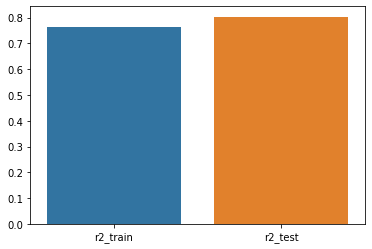

In [55]:
x_dem = [r2_train, r2_test]
sns.barplot(x = ['r2_train', 'r2_test'], y=x_dem)
plt.show()

## polynomial regression 

In [57]:
# feature_for_poly = "SalePrice"

# X1_train_poly_feature = X1_train[[feature_for_poly]]
# X1_test_poly_feature = X1_test[[feature_for_poly]]

In [60]:
amescleaned_df = ames_cleaned_df.drop(columns=["Id"])

KeyError: "['Id'] not found in axis"

In [ ]:
x2 = amescleaned_df.drop('SalePrice', axis=1)
y2 = amescleaned_df['SalePrice']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [ ]:
numerical_cols = x2.select_dtypes(include=np.number).columns
categorical_cols = x2.select_dtypes(include='object').columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}\n")

In [ ]:
#polynomial for numerical features
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
numerical_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # include_bias=False to avoid duplicate constant term
    ('scaler', StandardScaler()) # Scale after polynomial transformation
])

In [ ]:
#transform using OHE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' for robust encoding
])

In [ ]:
#apply transformations
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are
)

In [ ]:
#train the model
model_pipeline.fit(x2_train, y2_train)

In [ ]:
#see how well it performs
train_score = model_pipeline.score(x2_train, y2_train)
test_score = model_pipeline.score(x2_test, y2_test)

print(f"R-squared on training data: {train_score:.4f}")
print(f"R-squared on test data: {test_score:.4f}")